# ripple match verification

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import jax
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

# ripple test notebook implementing the random match
import sys
sys.path.append('../../ripple/test/')
from benchmark_waveform import random_match

%load_ext autoreload
%autoreload 2

params = {"axes.grid": True,
          "text.usetex" : True,
          "font.family" : "serif",
          "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.serif" : ["Computer Modern Serif"],
          "xtick.labelsize": 16,
          "ytick.labelsize": 16,
          "axes.labelsize": 16,
          "legend.fontsize": 16,
          "legend.title_fontsize": 16,
          "figure.titlesize": 16}

plt.rcParams.update(params)

### Auxiliary functions
def get_chi_eff(chi1, chi2, m1, m2):
    return (chi1 * m1 + chi2 * m2) / (m1 + m2)

def get_chirp_mass(m1, m2):
    return (m1 * m2)**(3/5) / (m1 + m2)**(1/5)

[CpuDevice(id=0)]
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preamble

Toggle this to true in case we want to rerun things

In [10]:
RUN_BENCHMARK_WAVEFORM = False

## Run the ripple match verification

In [11]:
N_samples = 1_000
bounds = {"m": [0.5, 3.0],
          "chi": [-0.05, 0.05],
          "lambda": [0, 5000],
          "d_L": [1, 400]
        }

outdir = "../data/"

approximant_list = ["IMRPhenomD", "TaylorF2", "IMRPhenomD_NRTidalv2"]
if RUN_BENCHMARK_WAVEFORM:
  for approximant in approximant_list:
      print(f"Checking {approximant}")
      random_match(N_samples, bounds, approximant, outdir, "../data/psds/psd.txt")

## Read in mismatch data

In [12]:
# Choose tidal waveform here
approximant_names = ["IMRPhenomD",
                     "IMRPhenomD_NRTidalv2", 
                     "TaylorF2"]

approximant_names_latex = [r"IMRPhenomD",
                           r"IMRPhenomD\_NRTidalv2", 
                           r"TaylorF2"]

matches_dict = {}
for approximant in approximant_names:

    matches_filename = os.path.join(os.getcwd(), f"../data/matches_data/matches_{approximant}.csv")
    print(f"Reading in matches from {matches_filename}")
    matches_df = pd.read_csv(matches_filename)

    ### Get the values
    m1_values = matches_df["m1"].values
    m2_values = matches_df["m2"].values
    q_values = matches_df["m2"] / matches_df["m1"].values
    chi1_values = matches_df["chi1"].values
    chi2_values = matches_df["chi2"].values
    mismatch_values = matches_df["mismatch"].values
    if approximant != "IMRPhenomD":
        lambda1_values = matches_df["lambda1"].values
        lambda2_values = matches_df["lambda2"].values
    else:
        lambda1_values = np.zeros(len(m1_values))
        lambda2_values = np.zeros(len(m1_values))

    # Add matches to dictionary
    matches_dict[approximant] = {} 
    matches_dict[approximant]["m1"] = m1_values
    matches_dict[approximant]["m2"] = m2_values
    matches_dict[approximant]["q"] = q_values
    matches_dict[approximant]["chi1"] = chi1_values
    matches_dict[approximant]["chi2"] = chi2_values
    matches_dict[approximant]["mismatch"] = mismatch_values
    matches_dict[approximant]["lambda1"] = lambda1_values
    matches_dict[approximant]["lambda2"] = lambda2_values

Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/matches_data/matches_IMRPhenomD.csv
Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/matches_data/matches_IMRPhenomD_NRTidalv2.csv
Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/matches_data/matches_TaylorF2.csv


## Plot the mismatch histograms

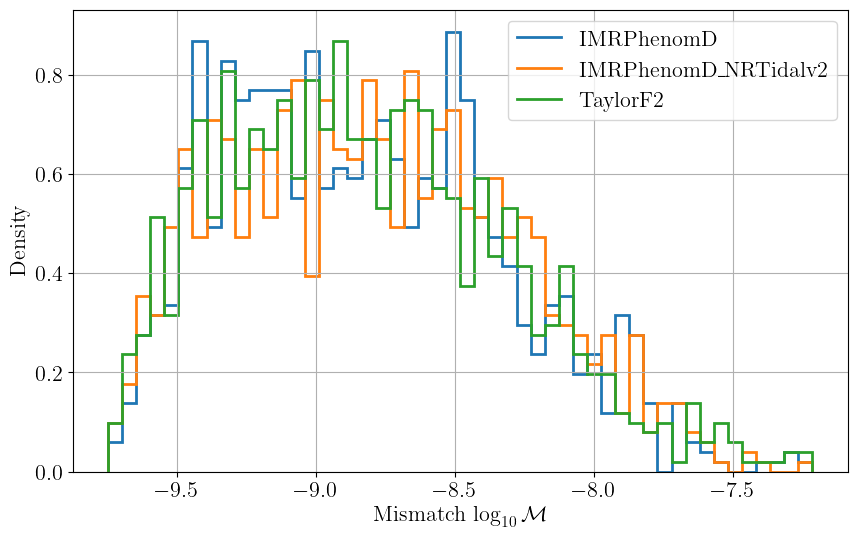

In [13]:
plt.figure(figsize = (10, 6))
counter = 0
for key, value in matches_dict.items():
    latex_label = approximant_names_latex[counter]
    mismatch_values = value["mismatch"]
    if counter == 0:
        counts, bins = np.histogram(mismatch_values, bins = 50, density=True)
    else:
        counts, _ = np.histogram(mismatch_values, bins = bins, density=True)
    plt.stairs(counts, bins, linewidth=2, label=latex_label)
    # plt.hist(mismatch_values, bins=50, histtype='step', linewidth=3, density=True, label=latex_label)
    
    counter += 1

plt.xlabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.legend()
plt.ylabel("Density")
plt.savefig("../figures/mismatch_histogram.pdf", bbox_inches="tight")
plt.show()

### Sanity check: without enforcing the bins to be the same

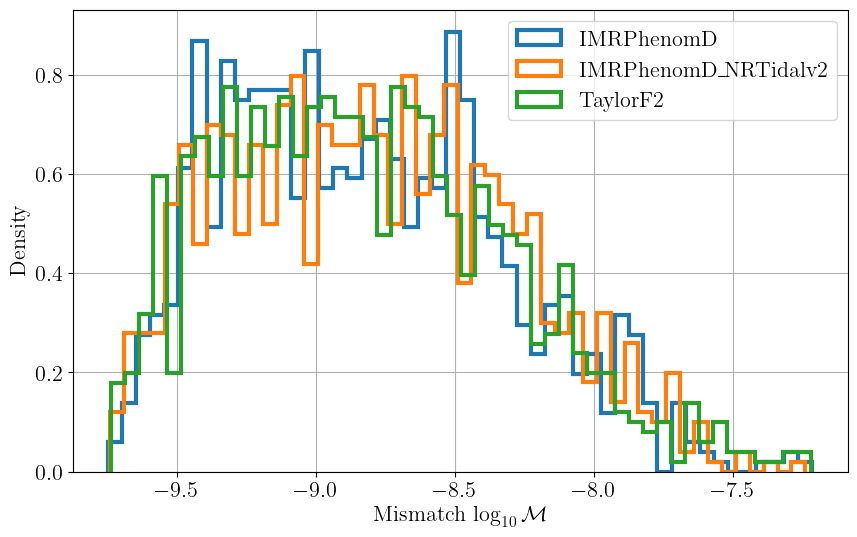

In [14]:
plt.figure(figsize = (10, 6))
counter = 0
for key, value in matches_dict.items():
    latex_label = approximant_names_latex[counter]
    mismatch_values = value["mismatch"]
    plt.hist(mismatch_values, bins=50, histtype='step', linewidth=3, density=True, label=latex_label)
    # plt.hist(mismatch_values, bins=50, histtype='step', linewidth=3, density=True, label=latex_label)
    
    counter += 1

plt.xlabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.legend()
plt.ylabel("Density")
# plt.savefig("../figures/mismatch_histogram.pdf", bbox_inches="tight")
plt.show()

## Extra: check sampled parameters

In [16]:
matches_filename = os.path.join(os.getcwd(), f"../data/matches_data/matches_IMRPhenomD.csv")
print(f"Waveform: {matches_filename}")
matches_df = pd.read_csv(matches_filename)
matches_df

Waveform: /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/matches_data/matches_IMRPhenomD.csv


,Unnamed: 0,m1,m2,chi1,chi2,dist_mpc,tc,phi_ref,inclination,match,mismatch
0,539,0.518875,0.501260,-0.024316,0.024370,265.160649,0.0,4.002014,5.375773,1.0,-7.213264
1,51,0.556212,0.529959,-0.029676,-0.034234,262.299187,0.0,5.844366,5.980393,1.0,-7.303458
2,610,0.571234,0.517939,-0.005336,-0.030363,391.022053,0.0,0.828286,1.069051,1.0,-7.305827
3,820,0.584909,0.516937,0.011783,-0.047944,331.606860,0.0,1.695288,2.463802,1.0,-7.321263
4,619,0.635446,0.514824,-0.048424,-0.005691,280.336044,0.0,3.351919,1.913022,1.0,-7.376981
...,...,...,...,...,...,...,...,...,...,...,...
995,162,2.852338,2.829808,0.011939,-0.028852,268.038600,0.0,1.473372,0.192844,1.0,-9.684409
996,35,2.906547,2.804661,-0.009828,-0.000301,25.165899,0.0,5.467395,1.576449,1.0,-9.691441
997,714,2.954741,2.862190,0.030920,-0.022643,390.866401,0.0,5.413773,4.429841,1.0,-9.717743
998,486,2.943630,2.896087,-0.039799,0.040727,263.518426,0.0,4.262588,4.224399,1.0,-9.723592


In [17]:
matches_filename = os.path.join(os.getcwd(), f"../data/matches_data/matches_IMRPhenomD_NRTidalv2.csv")
print(f"Waveform: {matches_filename}")
matches_df = pd.read_csv(matches_filename)
matches_df

Waveform: /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/matches_data/matches_IMRPhenomD_NRTidalv2.csv


,Unnamed: 0,m1,m2,chi1,chi2,lambda1,lambda2,dist_mpc,tc,phi_ref,inclination,match,mismatch
0,613,0.537029,0.501688,0.033667,-0.017619,4346.327474,1820.669311,183.910250,0.0,3.566227,3.668290,1.0,-7.238525
1,167,0.619862,0.520389,-0.049477,-0.017336,2563.098865,3991.465209,223.869978,0.0,2.399611,4.556394,1.0,-7.367388
2,6,0.666973,0.535043,-0.044714,-0.027527,2451.592168,2632.419247,77.164604,0.0,5.450751,3.537777,1.0,-7.439496
3,633,0.675918,0.540551,0.023994,-0.016137,70.581851,4303.605509,90.983856,0.0,3.074547,5.912186,1.0,-7.456281
4,4,0.766847,0.537535,-0.007732,-0.009735,2116.705098,4409.219600,138.464863,0.0,5.612997,3.875647,1.0,-7.540462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,926,2.980542,2.759089,0.010828,-0.021498,2463.110578,2780.235139,194.334880,0.0,1.114186,3.303949,1.0,-9.700242
996,756,2.958383,2.792568,0.024045,-0.002659,1232.032003,3044.871832,250.132030,0.0,1.640051,2.317911,1.0,-9.703029
997,565,2.971067,2.803031,-0.040516,-0.012901,938.705978,3087.572109,135.113028,0.0,0.489276,0.184737,1.0,-9.708793
998,514,2.984877,2.800622,-0.020284,0.019226,3349.790847,170.996455,218.024498,0.0,0.112681,2.635157,1.0,-9.711555


In [18]:
matches_filename = os.path.join(os.getcwd(), f"../data/matches_data/matches_TaylorF2.csv")
print(f"Waveform: {matches_filename}")
matches_df = pd.read_csv(matches_filename)
matches_df

Waveform: /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/matches_data/matches_TaylorF2.csv


,Unnamed: 0,m1,m2,chi1,chi2,lambda1,lambda2,dist_mpc,tc,phi_ref,inclination,match,mismatch
0,866,0.518335,0.505342,0.030613,0.032226,2190.886128,3163.156027,54.200543,0.0,0.047245,3.052882,1.0,-7.220170
1,695,0.530273,0.508535,0.038004,-0.021758,3514.287225,2242.686301,4.709336,0.0,2.542569,2.177384,1.0,-7.241164
2,386,0.537453,0.528579,-0.005518,-0.020511,828.973455,2479.280581,191.229213,0.0,1.690233,0.363172,1.0,-7.278854
3,536,0.562605,0.514873,0.026428,0.040156,4582.146962,2159.927858,357.562725,0.0,2.087107,5.442193,1.0,-7.292468
4,483,0.560642,0.541472,0.027154,-0.030354,238.752258,3530.453794,105.573380,0.0,5.670808,3.047110,1.0,-7.326611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,424,2.950862,2.750730,-0.042326,0.040107,471.666488,3409.579111,134.131263,0.0,3.920040,2.042936,1.0,-9.697766
996,683,2.915200,2.780696,-0.032934,0.020238,3740.692495,4427.186010,301.921278,0.0,1.929515,2.487041,1.0,-9.699888
997,498,2.926902,2.787770,-0.038781,0.006742,3634.939444,3888.872960,340.938226,0.0,4.270316,2.222422,1.0,-9.704351
998,535,2.956669,2.775455,-0.019993,0.016398,2022.465244,1637.284078,298.771181,0.0,4.788943,0.487514,1.0,-9.705308
